In [1]:
import math
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
from collections import Counter

from sklearn.model_selection import train_test_split

from data_manager import load_dataset

In [2]:
def load_dataset2(n_batches=10):
    imgs = []
    labels = []
    int2sym = np.load("data/int2sym.npy")
    for batch_i in range(n_batches):
        img_batch = np.load("data/imgs_batch_{}.npy".format(batch_i))
        labels_batch = np.load("data/labels_batch_{}.npy".format(batch_i))
        imgs.append(img_batch)
        labels.append(labels_batch)
        
    return np.concatenate(imgs), np.concatenate(labels), int2sym

In [3]:
imgs, labels, int2sym = load_dataset(10)

theta


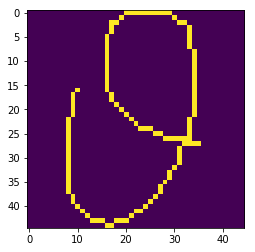

In [4]:
test_ind = 70000
plt.imshow(imgs[test_ind])
print(int2sym[labels[test_ind]])

In [5]:
tf.reset_default_graph()

n_symbols = 82

inputs = tf.placeholder(tf.float32, shape=[None, 45,45])
inputs_flatten = tf.reshape(inputs, shape=[-1,45*45])
targets = tf.placeholder(tf.int32, shape=[None])

targets_onehot = tf.one_hot(targets, n_symbols)

#h1 = tf.layers.dense(inputs_flatten, 3000, activation=tf.nn.relu)
h2 = tf.layers.dense(inputs_flatten, 1000, activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 500, activation=tf.nn.relu)
logits = tf.layers.dense(h3, n_symbols)
output = tf.nn.softmax(logits)

sc = tf.nn.softmax_cross_entropy_with_logits(labels=targets_onehot, logits=logits)

cost = tf.reduce_mean(sc)

optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(targets_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.5)

In [8]:
def get_batches(X,Y, batch_size):
    assert len(X) == len(Y)
    for i in range(0,len(X),batch_size):
        yield X[i:i+batch_size], Y[i:i+batch_size]
        
#list(get_batches(list(range(10)),list(range(10)),3))

In [11]:
X_valid.shape

(75195, 45, 45)

In [13]:
epochs = 30
batch_size = 256

sess = tf.Session()

sess.run(tf.global_variables_initializer())

loss_buffer = list()

for e in range(epochs):
    
    for X_batch, Y_batch in get_batches(X_train, y_train, batch_size):
    
        loss_value, _ = sess.run([cost, optimizer], feed_dict={
            inputs: X_batch,
            targets: Y_batch
        })
        
        loss_buffer.append(loss_buffer)

    acc_value = sess.run([accuracy], feed_dict={
        inputs: X_valid,
        targets: y_valid
    })
    
    print(e, loss_value, acc_value)
    

0 0.119647 [0.89310461]
1 0.0701757 [0.91456878]
2 0.335572 [0.91427624]
3 0.0283341 [0.92923731]
4 0.105066 [0.93185717]
5 0.00954354 [0.93512869]
6 0.00107931 [0.93907839]
7 0.274487 [0.94329411]
8 0.131784 [0.94015557]
9 0.0345881 [0.94728374]
10 0.188106 [0.94524902]
11 0.0034226 [0.94983709]
12 0.000624104 [0.95350754]
13 0.0346056 [0.95227075]
14 0.403118 [0.95106059]
15 3.99846e-07 [0.95465124]
16 0.0798659 [0.95502359]
17 2.23749 [0.95837492]
18 4.58929e-06 [0.95657957]
19 0.000232658 [0.95548904]
20 7.79813e-07 [0.95739079]
21 7.20222e-08 [0.95753706]
22 0.0498347 [0.95700514]
23 1.14242e-07 [0.95942551]
24 0.138292 [0.95921272]
25 1.40495e-05 [0.95877385]
26 0.00228871 [0.95892012]
27 0.0 [0.95906645]
28 0.0538468 [0.95896006]
29 0.0 [0.95653969]


In [14]:
#plt.plot(loss_buffer)

In [15]:
acc_value = sess.run([accuracy], feed_dict={
    inputs: X_test,
    targets: y_test
})

print(acc_value)

[0.95668596]


In [29]:
def load_random_img():
    random_symbol = np.random.choice(os.listdir("../data.rar/data/extracted_images"))
    print(random_symbol)
    random_img = np.random.choice(os.listdir("../data.rar/data/extracted_images/" + random_symbol))
    img = Image.open("../data.rar/data/extracted_images/" + random_symbol +  "/" + random_img)
    #return img
    array = np.array(img)
    return array < 128

In [96]:
def load_test_img():
    img = Image.open("test_img.png")
    array = np.array(img)
    return np.squeeze(array[:,:,1]) < 128

#plt.imshow(load_test_img())

['+', 'neq', '4', '}', 'cos']
+


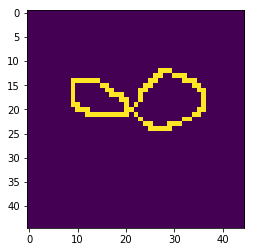

In [120]:
rand_img = load_test_img()

output_value = sess.run(output, feed_dict={
    inputs: [rand_img]
})

top_outputs = []
for ind in np.argsort(output_value)[0][::-1][:5]:
    top_outputs.append(int2sym[ind])

#print(np.argsort(output_value)[0][::-1][:5])
#print(np.argmax(output_value))

print(top_outputs)
print(int2sym[np.argmax(output_value)])

plt.imshow(rand_img)

In [18]:
np.random.choice(os.listdir("../data.rar/data/extracted_images"))

'phi'

In [121]:
saver = tf.train.Saver()

In [127]:
saver.save(sess, "./model/model.ckpt")

'./model/model.ckpt'